In [2]:
import os
from time import time
from time import sleep
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd

def automate_api():
    
    global df
    #Connect to Crypto API
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15', # Can adjust amount of rows ran through each iteration below
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'b0cdd7b6-c909-4f17-9bb7-a63824607d28', # Hide key info
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    # Transform API JSON format to DataFrame
    df = pd.json_normalize(data['data'])


    # Add timestamp column to display time ran
    df['timestamp'] = pd.to_datetime('now',utc=True)   
    
    # Save results to API folder/ file
    if not os.path.isfile("/Users/sophiehester/Desktop/API/API.csv"):
        df.to_csv("/Users/sophiehester/Desktop/API/API.csv", header='column_names')
    else:
        df.to_csv("/Users/sophiehester/Desktop/API/API.csv", mode='a', header=False)
        

        
for i in range(24):# Only for one day
        automate_api()
        print ('API Runner completed successfully')
        sleep(3600) # Sleep for one hour
exit()

In [4]:
# Load dataframe
df = pd.read_csv(r"/Users/sophiehester/Desktop/API/API.csv")
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9791,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19185900.00000,...,39.98000,402447882039.50000,NaN,2022-10-22T00:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-22 00:13:19.165691+00:00
1,1,1027,Ethereum,ETH,ethereum,6144,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122373863.49900,...,17.28110,158971115812.38000,NaN,2022-10-22T00:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-22 00:13:19.165691+00:00
2,2,825,Tether,USDT,tether,41137,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,68453109229.79373,...,7.44270,70146653413.74001,NaN,2022-10-22T00:11:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-10-22 00:13:19.165691+00:00
3,3,3408,USD Coin,USDC,usd-coin,6578,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,43882130552.60740,...,4.77030,43882621755.35000,NaN,2022-10-22T00:11:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-10-22 00:13:19.165691+00:00
4,4,1839,BNB,BNB,bnb,1129,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.00000,159980916.24332,...,4.69200,53952100932.43000,NaN,2022-10-22T00:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-22 00:13:19.165691+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,10,3890,Polygon,MATIC,polygon,502,2019-04-28T00:00:00.000Z,"['platform', 'enterprise-solutions', 'scaling'...",10000000000.00000,8734317475.28493,...,0.78820,8335994320.31000,NaN,2022-10-22T23:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-22 23:13:34.007094+00:00
356,11,6636,Polkadot,DOT,polkadot-new,421,2020-08-19T00:00:00.000Z,"['substrate', 'polkadot', 'binance-chain', 'po...",NaN,1129023933.65555,...,0.71520,7283500874.79000,NaN,2022-10-22T23:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-22 23:13:34.007094+00:00
357,12,4943,Dai,DAI,multi-collateral-dai,1439,2019-11-22T00:00:00.000Z,"['defi', 'stablecoin', 'asset-backed-stablecoi...",NaN,6213309092.79735,...,0.67260,6213100349.36000,NaN,2022-10-22T23:12:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x6b175474e89094c44da98b954eedeac495271d0f,2022-10-22 23:13:34.007094+00:00
358,13,1958,TRON,TRX,tron,694,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem']",NaN,92291261543.70895,...,0.61760,5705631366.17000,NaN,2022-10-22T23:12:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-22 23:13:34.007094+00:00


In [12]:
# Data cleansing

# Get rid of scientific notation.
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Round to 2 decimal places
df.round(2)

# Import all columns
pd.set_option('display.max_columns', None)

# Import all rows
pd.set_option('display.max_rows', None)
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9791,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19185900.00000,19185900.00000,NaN,1,NaN,NaN,NaN,2022-10-22T00:11:00.000Z,19164.18486,32367128931.29203,33.01830,-0.11306,0.60373,-0.18854,3.39933,-10.48337,-15.12162,367682134286.74939,39.98000,402447882039.50000,NaN,2022-10-22T00:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-22 00:13:19.165691+00:00
1,1,1027,Ethereum,ETH,ethereum,6144,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122373863.49900,122373863.49900,NaN,2,NaN,NaN,NaN,2022-10-22T00:11:00.000Z,1299.06102,10356132227.43666,16.14740,-0.16223,1.26104,0.05385,3.92633,-19.85666,-16.88397,158971115812.38214,17.28110,158971115812.38000,NaN,2022-10-22T00:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-22 00:13:19.165691+00:00
2,2,825,Tether,USDT,tether,41137,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,68453109229.79373,70141766321.78847,NaN,3,NaN,NaN,NaN,2022-10-22T00:11:00.000Z,1.00007,41282242577.55804,25.85870,-0.00143,0.00427,-0.00139,-0.00435,0.01404,0.00328,68457878665.41962,7.44270,70146653413.74001,NaN,2022-10-22T00:11:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-10-22 00:13:19.165691+00:00
3,3,3408,USD Coin,USDC,usd-coin,6578,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,43882130552.60740,43882130552.60740,NaN,4,NaN,NaN,NaN,2022-10-22T00:11:00.000Z,1.00001,3235752686.86372,21.22710,-0.00711,0.00178,-0.00408,-0.01384,-0.01314,-0.01357,43882621755.34852,4.77030,43882621755.35000,NaN,2022-10-22T00:11:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-10-22 00:13:19.165691+00:00
4,4,1839,BNB,BNB,bnb,1129,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",200000000.00000,159980916.24332,159980916.24332,NaN,5,NaN,NaN,NaN,2022-10-22T00:11:00.000Z,269.76050,590987217.06394,9.94730,-0.03336,0.33270,-0.02342,1.78294,-10.06334,3.55388,43156532702.11147,4.69200,53952100932.43000,NaN,2022-10-22T00:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-22 00:13:19.165691+00:00
5,5,52,XRP,XRP,xrp,827,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,49887015710.00000,99989258607.00000,NaN,6,NaN,NaN,NaN,2022-10-22T00:11:00.000Z,0.46019,1625692263.54925,-5.74110,0.25430,2.87882,-6.01802,15.64681,33.68086,27.62640,22957460377.02880,2.49680,46018909029.32000,NaN,2022-10-22T00:11:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-10-22 00:13:19.165691+00:00
6,6,4687,Binance USD,BUSD,binance-usd,5315,2019-09-20T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'bin...",NaN,21628100610.95000,21628100610.95000,NaN,7,NaN,NaN,NaN,2022-10-22T00:11:00.000Z,1.00029,5851211347.21062,5.79380,-0.05304,0.05600,-0.06598,-0.01210,0.01019,-0.07918,21634424672.27170,2.35290,21634424672.27000,NaN,2022-10-22T00:11:00.000Z,1839.00000,BNB,BNB,bnb,BUSD-BD1,2022-10-22 00:13:19.165691+00:00
7,7,2010,Cardano,ADA,cardano,584,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34302329551.05700,35045020830.32300,NaN,8,NaN,NaN,NaN,2022-10-22T00:11:00.000Z,0.34927,509547658.39293,3.35860,0.19128,2.78040,-4.91699,-20.90133,-24.35086,-32.70177,11980854348.80416,1.30300,15717254564.12000,NaN,20

In [13]:
# Stack table to pivot data and make it more readable
df2 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df2

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.00433,0.52549,0.20718,1.13774,-10.35911,-15.27026
Ethereum,0.04699,1.34752,1.45389,1.74961,-19.58914,-17.89493
Tether,-0.00027,0.00346,-0.00092,-0.00023,0.00998,0.00507
USD Coin,-0.00031,-0.00611,-0.00225,-0.00769,-0.00323,-0.00811
BNB,0.00908,0.41863,-0.12738,0.36436,-9.51940,2.87155
XRP,0.05642,3.24888,-4.71548,6.48603,35.24361,27.74725
Binance USD,-0.00432,0.01036,0.01820,0.00907,0.01700,0.02285
Cardano,0.03679,2.41294,-4.64084,-22.54654,-23.93384,-32.81090
Solana,-0.01614,0.12431,-6.70239,-12.19023,-21.06496,-31.34203


In [14]:
df3 = df2.stack()
df3

name                                     
Bitcoin      quote.USD.percent_change_1h      0.00433
             quote.USD.percent_change_24h     0.52549
             quote.USD.percent_change_7d      0.20718
             quote.USD.percent_change_30d     1.13774
             quote.USD.percent_change_60d   -10.35911
             quote.USD.percent_change_90d   -15.27026
Ethereum     quote.USD.percent_change_1h      0.04699
             quote.USD.percent_change_24h     1.34752
             quote.USD.percent_change_7d      1.45389
             quote.USD.percent_change_30d     1.74961
             quote.USD.percent_change_60d   -19.58914
             quote.USD.percent_change_90d   -17.89493
Tether       quote.USD.percent_change_1h     -0.00027
             quote.USD.percent_change_24h     0.00346
             quote.USD.percent_change_7d     -0.00092
             quote.USD.percent_change_30d    -0.00023
             quote.USD.percent_change_60d     0.00998
             quote.USD.percent_change_90

In [15]:
# Now it is a series, and we want to move it back to a dataframe
type(df3)

pandas.core.series.Series

In [16]:
# Move it back to a frame
df4 = df3.to_frame(name='values')
df3

name                                     
Bitcoin      quote.USD.percent_change_1h      0.00433
             quote.USD.percent_change_24h     0.52549
             quote.USD.percent_change_7d      0.20718
             quote.USD.percent_change_30d     1.13774
             quote.USD.percent_change_60d   -10.35911
             quote.USD.percent_change_90d   -15.27026
Ethereum     quote.USD.percent_change_1h      0.04699
             quote.USD.percent_change_24h     1.34752
             quote.USD.percent_change_7d      1.45389
             quote.USD.percent_change_30d     1.74961
             quote.USD.percent_change_60d   -19.58914
             quote.USD.percent_change_90d   -17.89493
Tether       quote.USD.percent_change_1h     -0.00027
             quote.USD.percent_change_24h     0.00346
             quote.USD.percent_change_7d     -0.00092
             quote.USD.percent_change_30d    -0.00023
             quote.USD.percent_change_60d     0.00998
             quote.USD.percent_change_90

In [17]:
# We want indexes

df5 = df4.reset_index()
df5

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.00433
1,Bitcoin,quote.USD.percent_change_24h,0.52549
2,Bitcoin,quote.USD.percent_change_7d,0.20718
3,Bitcoin,quote.USD.percent_change_30d,1.13774
4,Bitcoin,quote.USD.percent_change_60d,-10.35911
5,Bitcoin,quote.USD.percent_change_90d,-15.27026
6,Ethereum,quote.USD.percent_change_1h,0.04699
7,Ethereum,quote.USD.percent_change_24h,1.34752
8,Ethereum,quote.USD.percent_change_7d,1.45389
9,Ethereum,quote.USD.percent_change_30d,1.74961


In [18]:
# Add indexes and raname percent_change values
df6 = df5.rename(columns={'level_1': 'percent_change'})
df6['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df6

,name,percent_change,values
0,Bitcoin,1h,0.00433
1,Bitcoin,24h,0.52549
2,Bitcoin,7d,0.20718
3,Bitcoin,30d,1.13774
4,Bitcoin,60d,-10.35911
5,Bitcoin,90d,-15.27026
6,Ethereum,1h,0.04699
7,Ethereum,24h,1.34752
8,Ethereum,7d,1.45389
9,Ethereum,30d,1.74961


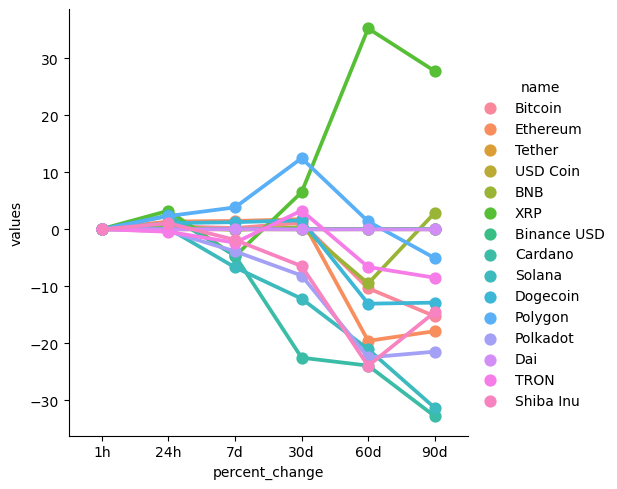

In [19]:
# Percent change over time in USD
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x='percent_change', y='values', hue='name', data=df6, kind='point')

In [32]:
# DataFrame with Bitcoin's Market Cap over 24 hours
# Analyze Change over time
# Market Cap = circulating supply * USD
pd.options.mode.chained_assignment = None  # default='warn'
df = pd.read_csv(r"/Users/sophiehester/Desktop/API/API.csv")
df10 = df[['name','circulating_supply','quote.USD.price','timestamp']]
df10['market_cap'] = df['circulating_supply']*df['quote.USD.price']
df10 = df10.query("name == 'Bitcoin'")

# Take time out from time stamp
df10['timestamp'] = df10['timestamp'].str[10:16]
df10

,name,circulating_supply,quote.USD.price,timestamp,market_cap
0,Bitcoin,19185900.00000,19164.18486,00:13,367682134286.74939
15,Bitcoin,19185900.00000,19174.88994,01:13,367887520819.56897
30,Bitcoin,19186000.00000,19164.57916,02:13,367691615765.06512
45,Bitcoin,19186000.00000,19136.51915,03:13,367153256503.41345
60,Bitcoin,19186062.00000,19157.54492,04:13,367557844672.36725
75,Bitcoin,19186062.00000,19156.99039,05:13,367547205438.87061
90,Bitcoin,19186112.00000,19154.48866,06:13,367500164753.32568
105,Bitcoin,19186112.00000,19157.49732,07:13,367557889192.68170
120,Bitcoin,19186181.00000,19177.73774,08:13,367947547421.25201
135,Bitcoin,19186181.00000,19159.97272,09:13,367606704618.15198


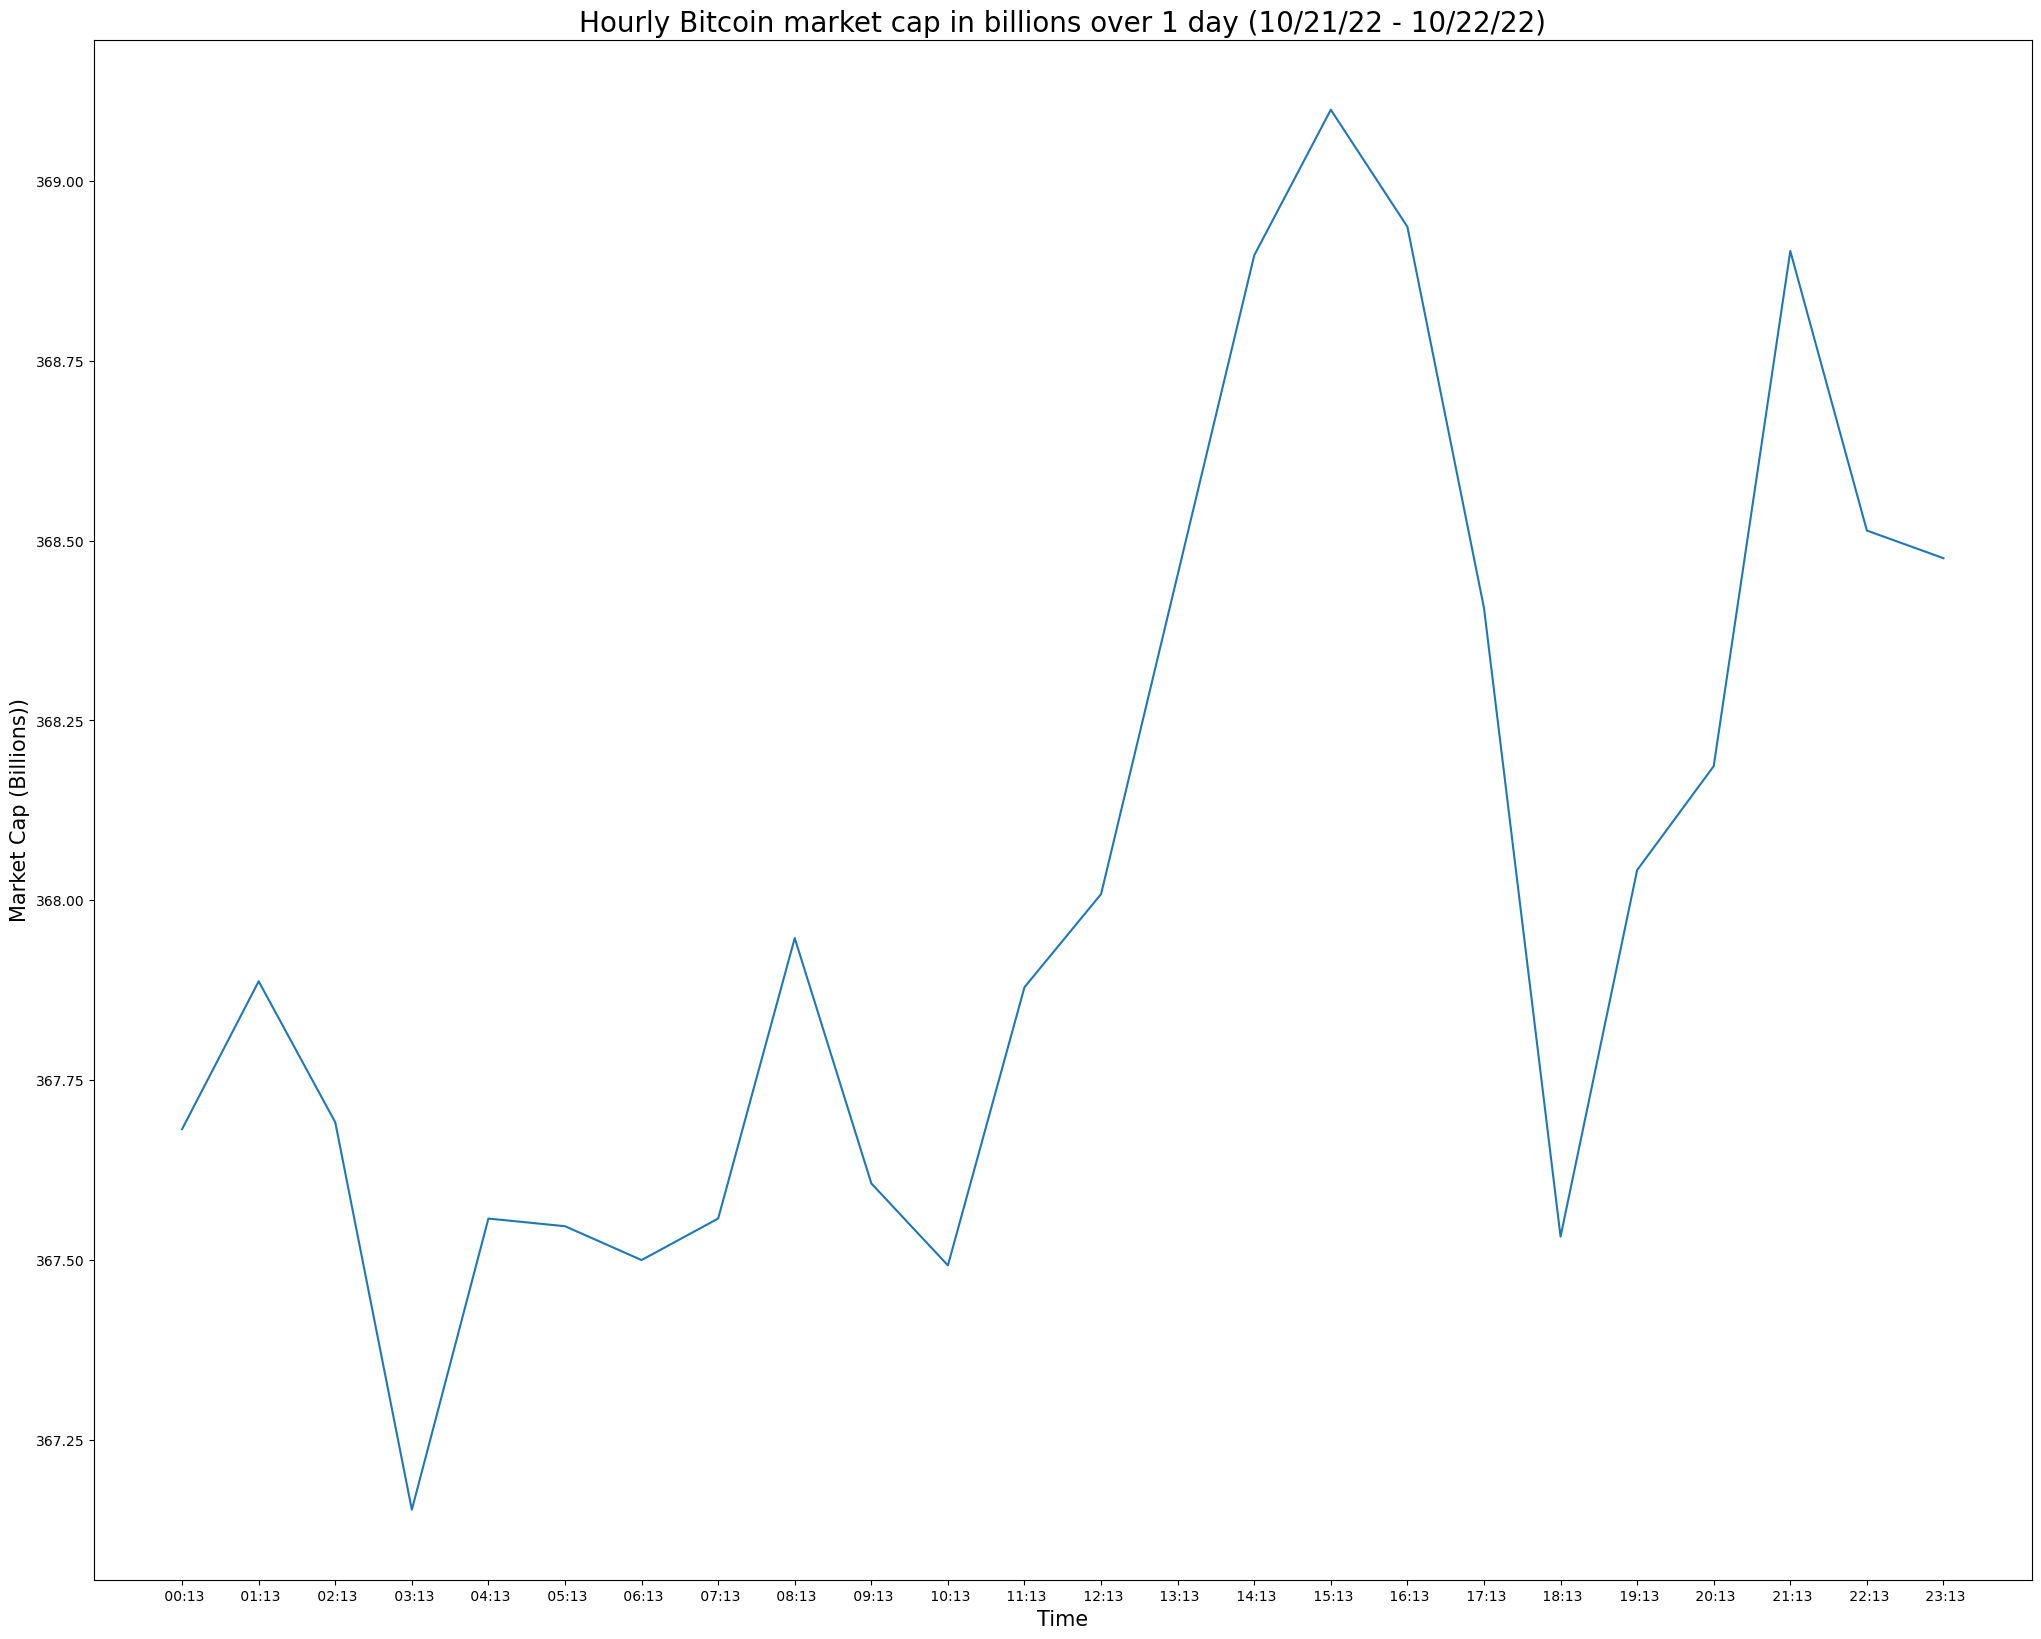

In [38]:
# Show market_cap in billions rounded to 2 decimals
df10['market_cap_billions'] = (df10['market_cap'].astype(float)/1000000000)
plt.figure(figsize=(25,20))
sns.lineplot(x='timestamp', y='market_cap_billions', data = df10).set_title('Hourly Bitcoin market cap in billions over 1 day (10/21/22 - 10/22/22)',fontsize=20)
plt.xlabel("Time",fontsize=15)
plt.ylabel("Market Cap (Billions))",fontsize=15)
plt.show()

# Conclusion: 15:13 had the highest relative value (Good time to buy)

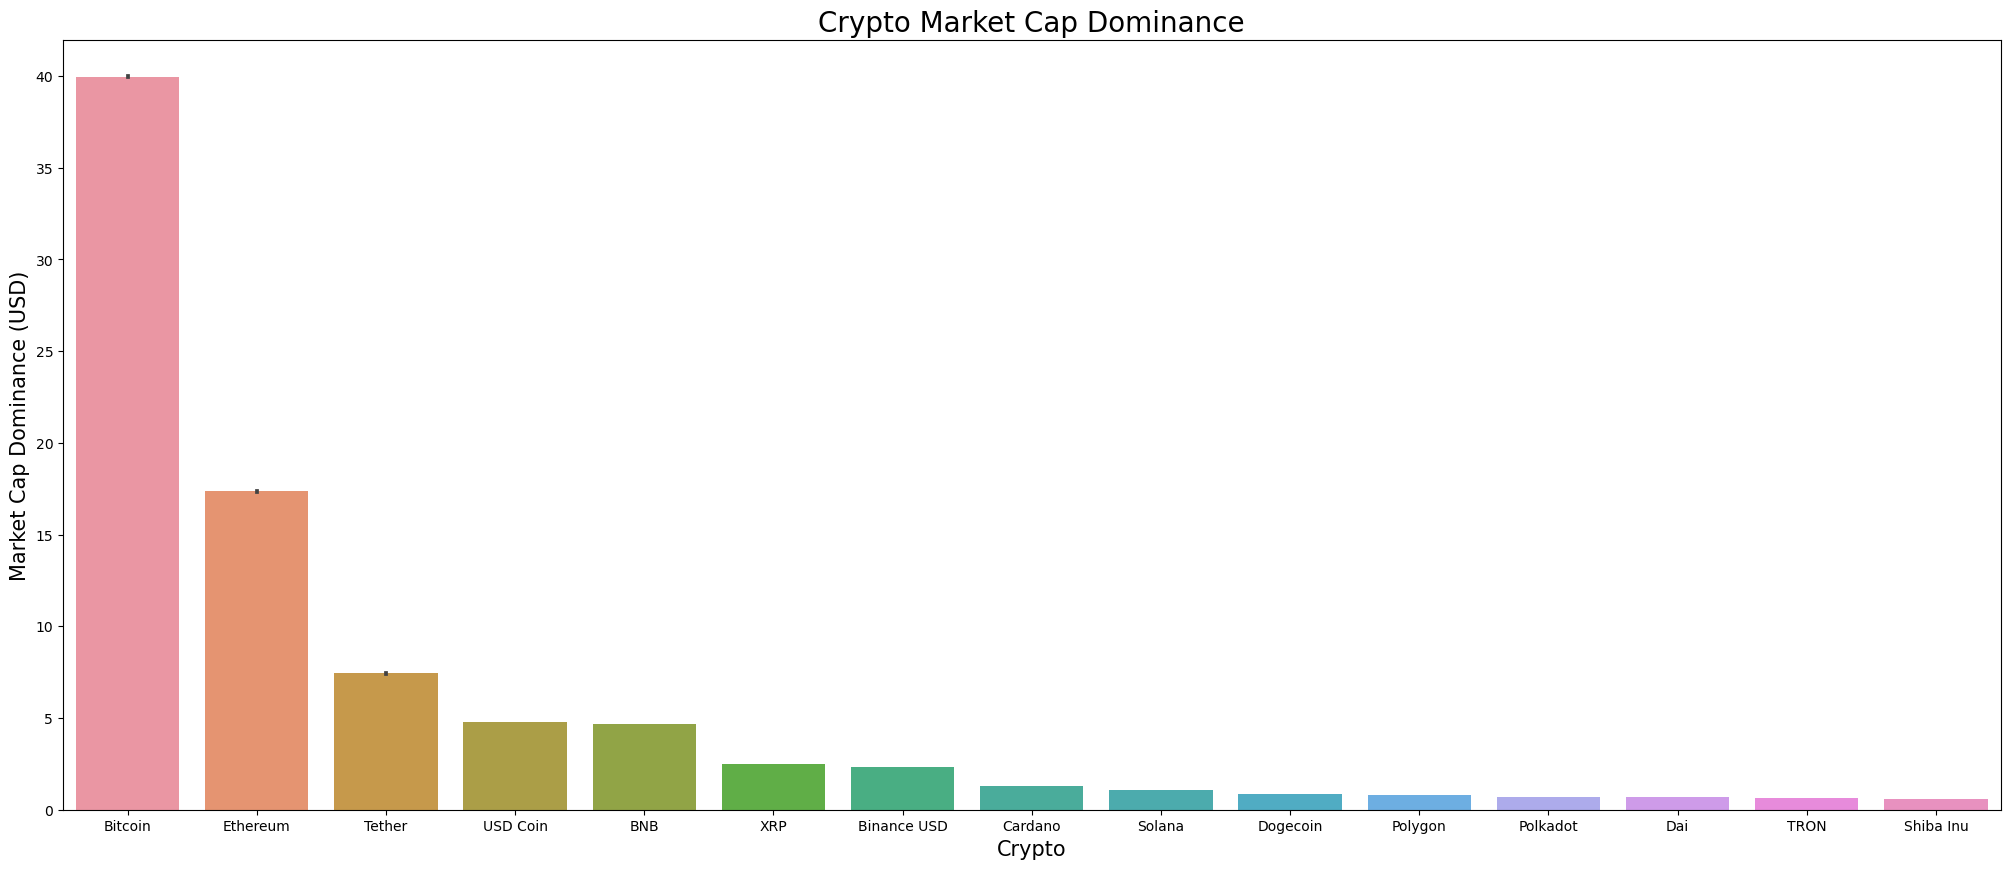

In [39]:
# Market Cap dominance, proving how strong Bitcoin is compared to to other crypto currency
plt.figure(figsize=(25,10))
sns.barplot(x='name', y='quote.USD.market_cap_dominance', data=df)
plt.xlabel("Crypto",fontsize=15)
plt.ylabel("Market Cap Dominance (USD)",fontsize=15)
plt.title("Crypto Market Cap Dominance",fontsize=20)
plt.show()        

# Conclusion: Shiba Inu is a much less traded coin relative to other crypto in the market.